# *Short-Time Fourier Transform* in sinusoidal signals
This notebook aims to show how to apply the Short-Time Fourier Transform (STFT) in a simple sinusoidal signal in python. In order to do so, we will first generate a sinusoidal signal (i.e. periodic) and then apply and interpret its STFT.

In [1]:
### Importing libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [2]:
%matplotlib inline

In [3]:
import scipy.signal as signal

## Generating the signal

In signal processing, a time series is usually the effort resulting from a sampling process. When this signal is generated, as is the case now, we must also establish the time where the signal suppostly occurs. The function below emulates the sampling process and has as an input the initial and the final time sample.  

It's important to notice that when creating different time series in order to generate signals with specific parameters, the sample frequency must be the same for the whole period, as well as its continuity must be assured.

In [4]:
def timeSeries(fs, ti, tf):
    '''Returns a time series accordingly to the following parameters:
        fs = the sampling rate, in hertz (e.g. 1e3 for 1kHz);
        ti = the starting time (e.g. second 0);
        tf = the final time (e.g. second 1).'''
    T = 1./fs
    timeSeries = np.arange(ti,tf,T)
    return timeSeries

In [5]:
## Sampling time for 0s to 10s, 1kHz:
time = timeSeries(1e3,0,10)

The sinusoidal signal is generated from the following function:  
$y(t) = sin(2\pi ft)$, where $f$ is the frequency in Hertz of the signal $y(t)$ and $t$ is the time series generated above.

In [6]:
## Defining some useful functions
def genSignal(freq, amp, timeSeries):
    '''Returns the time series for a sinusoidal signal, where:
        freq = frequency in Hertz (integer);
        amp = signal amplitude (float);
        timeSeries = the linear time series accordingly to the sample rate.'''
    signal = amp*np.sin(freq*2*np.pi*timeSeries)
    return signal    

def plotSignal(signal, timeSeries, figsize=(6,3)):
    '''Besides designed to plot a sine wave, can plot any time domain signal, where:
        signal = numpy array for the signal (it also works for Pandas.Series);
        timeSeries = the linear time series x-axis accordingly to the sample rate;
        figsize = the plot size, set as (6,3) by default.'''
    #The line above can be adjusted for more than one signal plot.
    fig, axes = plt.subplots(1,1, figsize=figsize)
    plt.plot(timeSeries, signal)
    #Adjust the ylim to go 10% above and below from the signal amplitudes
    axes.set_ylim(signal.min()+signal.min()*0.1, signal.max()+signal.max()*0.1)
    axes.grid(True)
    axes.set_ylabel('Signal amplitude')
    axes.set_xlabel('Time (s)')
    #axes.set_title('A {0}Hz sine wave'.format(freq))
    return

def sineWave(freq, amp, timeSeries):
    '''Generates and plots a sine wave using genSignal() and plotSignal().
        freq = frequency in Hertz (int);
        amp = signal amplitude (float);
        timeSeries = a linear time series accordingly to the sample rate.'''
    signal = genSignal(freq, amp, timeSeries)
    plotSignal(signal, timeSeries)
    return signal

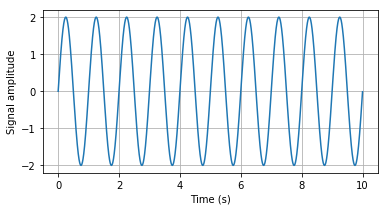

In [7]:
## Generating a sine wave of 1Hz and amplitude of 2:
sign1 = sineWave(1, 2, time)

## Applying the STFT:

The STFT from SciPy library will always calculate the frequency accordingly to the half of the sampling frequency. 

In [8]:
## Creating a test sine wave:
fs = 1e3
testTime = timeSeries(fs,0,10)
testSignal = genSignal(20,3,testTime)

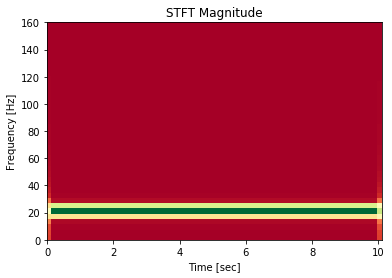

In [9]:
## Calculating the STFT spectrogram
## Reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.stft.html
f, t, Zxx = signal.stft(testSignal, fs)
plt.pcolormesh(t, f, np.abs(Zxx), cmap=plt.get_cmap('RdYlGn'))
plt.title('STFT Magnitude')
plt.ylim(0,160)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [10]:
def calcSTFT(inputSignal, samplingFreq, window='hann', nperseg=256, figsize=(8,5), cmap='RdYlGn', ylim_max=None):
    '''Calculates the STFT for a time series:
        inputSignal: numpy array for the signal (it also works for Pandas.Series);
        samplingFreq: the sampling frequency;
        window : str or tuple or array_like, optional
            Desired window to use. If `window` is a string or tuple, it is
            passed to `get_window` to generate the window values, which are
            DFT-even by default. See `get_window` for a list of windows and
            required parameters. If `window` is array_like it will be used
            directly as the window and its length must be nperseg. Defaults
            to a Hann window.
        nperseg : int, optional
            Length of each segment. Defaults to 256.
        figsize: the plot size, set as (6,3) by default;
        cmap: the color map, set as the divergence Red-Yellow-Green by default;
        ylim_max: the max frequency to be shown. By default it's the half sampling frequency.'''
    f, t, Zxx = signal.stft(inputSignal, samplingFreq, window=window, nperseg=nperseg)
    fig, axes = plt.subplots(1,1, figsize=figsize)
    plt.pcolormesh(t, f, np.abs(Zxx), cmap=plt.get_cmap(cmap))
    axes.grid(True)
    axes.set_title('STFT Magnitude')
    if ylim_max:
        axes.set_ylim(0,ylim_max)
    axes.set_ylabel('Frequency [Hz]')
    axes.set_xlabel('Time [sec]')
    plt.show()
    return

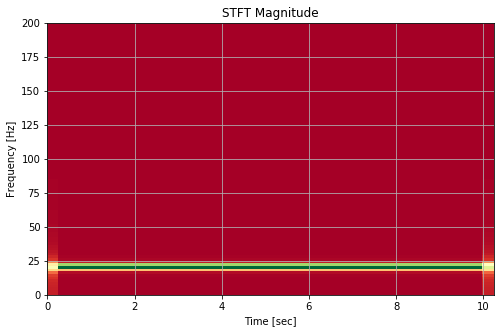

In [11]:
calcSTFT(testSignal, 1e3, nperseg=512, ylim_max=200)

In [12]:
def calcSTFT_norm(inputSignal, samplingFreq, window='hann', nperseg=256, figsize=(9,5), cmap='magma', ylim_max=None):
    '''Calculates the STFT for a time series:
        inputSignal: numpy array for the signal (it also works for Pandas.Series);
        samplingFreq: the sampling frequency;
        window : str or tuple or array_like, optional
            Desired window to use. If `window` is a string or tuple, it is
            passed to `get_window` to generate the window values, which are
            DFT-even by default. See `get_window` for a list of windows and
            required parameters. If `window` is array_like it will be used
            directly as the window and its length must be nperseg. Defaults
            to a Hann window.
        nperseg : int, optional
            Length of each segment. Defaults to 256.
        figsize: the plot size, set as (6,3) by default;
        cmap: the color map, set as the divergence Red-Yellow-Green by default;
        ylim_max: the max frequency to be shown. By default it's the half sampling frequency.'''
    ##Calculating STFT
    f, t, Zxx = signal.stft(inputSignal, samplingFreq, window=window, nperseg=nperseg)
    ##Plotting STFT
    fig = plt.figure(figsize=figsize)
    ### Different methods can be chosen for normalization: PowerNorm; LogNorm; SymLogNorm.
    ### Reference: https://matplotlib.org/tutorials/colors/colormapnorms.html
    spec = plt.pcolormesh(t, f, np.abs(Zxx), 
                          norm=colors.PowerNorm(gamma=1./8.),
                          #norm=colors.LogNorm(vmin=np.abs(Zxx).min(), vmax=np.abs(Zxx).max()),
                          #norm=colors.SymLogNorm(linthresh=0.13, linscale=1,
                          #                       vmin=-1.0, vmax=1.0),
                          cmap=plt.get_cmap(cmap))
    cbar = plt.colorbar(spec)
    ##Plot adjustments
    plt.title('STFT Spectrogram')
    ax = fig.axes[0]
    ax.grid(True)
    ax.set_title('STFT Magnitude')
    if ylim_max:
        ax.set_ylim(0,ylim_max)
    ax.set_ylabel('Frequency [Hz]')
    ax.set_xlabel('Time [sec]')
    fig.show
    return

In [13]:
def calcSTFT_norm_output(inputSignal, samplingFreq, window='hann', nperseg=256, figsize=(9,5), cmap='magma', ylim_max=None):
    '''Calculates the STFT for a time series:
        inputSignal: numpy array for the signal (it also works for Pandas.Series);
        samplingFreq: the sampling frequency;
        window : str or tuple or array_like, optional
            Desired window to use. If `window` is a string or tuple, it is
            passed to `get_window` to generate the window values, which are
            DFT-even by default. See `get_window` for a list of windows and
            required parameters. If `window` is array_like it will be used
            directly as the window and its length must be nperseg. Defaults
            to a Hann window.
        nperseg : int, optional
            Length of each segment. Defaults to 256.
        figsize: the plot size, set as (6,3) by default;
        cmap: the color map, set as the divergence Red-Yellow-Green by default;
        ylim_max: the max frequency to be shown. By default it's the half sampling frequency.
        
        This function is the same as "calcSTFT_norm(), but outputing the following:
        f: the frequency values
        t: the time values
        Zxx: the STFT values"'''
    ##Calculating STFT
    f, t, Zxx = signal.stft(inputSignal, samplingFreq, window=window, nperseg=nperseg)
    ##Plotting STFT
    fig = plt.figure(figsize=figsize)
    ### Different methods can be chosen for normalization: PowerNorm; LogNorm; SymLogNorm.
    ### Reference: https://matplotlib.org/tutorials/colors/colormapnorms.html
    spec = plt.pcolormesh(t, f, np.abs(Zxx), 
                          norm=colors.PowerNorm(gamma=1./8.),
                          #norm=colors.LogNorm(vmin=np.abs(Zxx).min(), vmax=np.abs(Zxx).max()),
                          #norm=colors.SymLogNorm(linthresh=0.13, linscale=1,
                          #                       vmin=-1.0, vmax=1.0),
                          cmap=plt.get_cmap(cmap))
    cbar = plt.colorbar(spec)
    ##Plot adjustments
    plt.title('STFT Spectrogram')
    ax = fig.axes[0]
    ax.grid(True)
    ax.set_title('STFT Magnitude')
    if ylim_max:
        ax.set_ylim(0,ylim_max)
    ax.set_ylabel('Frequency [Hz]')
    ax.set_xlabel('Time [sec]')
    fig.show
    return f,t,Zxx

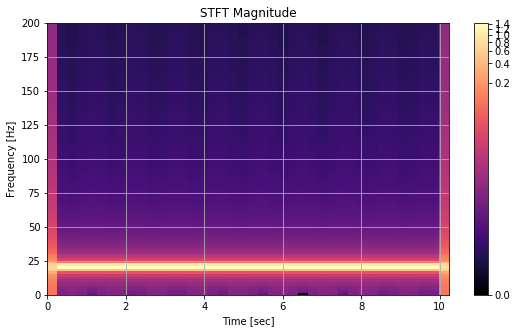

In [14]:
calcSTFT_norm(testSignal, 1e3, nperseg=512, ylim_max=200)

## Simulating the LANL time:

In [15]:
fsLANL = 4e6 #4MHz
time1 = timeSeries(fsLANL,0,1)
time2 = timeSeries(fsLANL,1,2)
timeLANL = np.concatenate((time1, time2), axis=None)

In [16]:
lanl1 = genSignal(20,50,time1)
lanl2 = genSignal(113,28,time2) + genSignal(70,53,time2)
lanl = np.concatenate((lanl1,lanl2), axis=None)

There's no specific rule to determine the number of samples per segment. However, it's useful to consider 1/4 of the sampling rate. E.g. for a 1kHz sampling rate, the nperseg parameter is set by default to 256. If we consider 4MHz, we can estimate the ideal nperseg by $log_2(4e6 / 4)$.

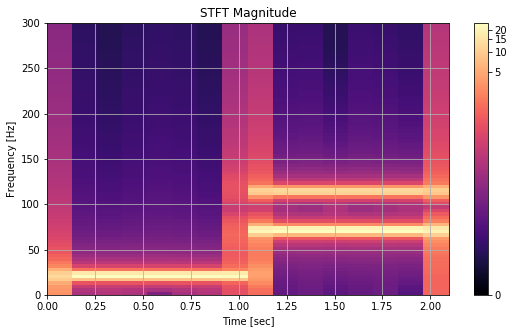

In [17]:
#calcSTFT(lanl1, fsLANL, nperseg=16384, ylim_max=1e3)
calcSTFT_norm(lanl, fsLANL, nperseg=1048576, ylim_max=300, cmap='magma')

### Understanding the output parameters:

I got a little bit confused when I tried to use the STFT values as features for a classifier. To make it clear, nothing is better than trying to understand them through a simpler and controlled example, as the signals we are dealing with here.  

Accordingly to the scipy.signal.stft documentation (we use this module in our previous function), the output is as follow:  
> * f : ndarray  
> Array of sample frequencies.  
> * t : ndarray  
> Array of segment times.  
> * Zxx : ndarray  
> STFT of x. By default, the last axis of Zxx corresponds to the segment times.  

We now adjusted the calcSTFT_norm() function to calcSTFT_norm_output(), which returns those arrays.

In [18]:
np.log2(150000)

17.194602975157967

In [19]:
2**20

1048576

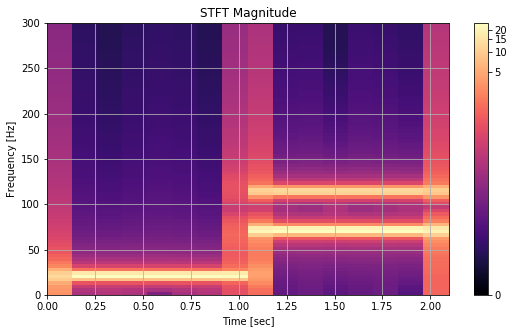

In [20]:
f, t, Zxx = calcSTFT_norm_output(lanl, fsLANL, nperseg=2**20, ylim_max=300, cmap='magma')

Now, let's look closer all the attributes: 

In [21]:
print('## About the signal:\nSampling frequency: {0}\nSignal.shape: {1}\n\n## About the STFT:\nNperseg: {2}\nOutput f.shape: {3}\nOutput t.shape: {4}\nOutput Zxx.shape: {5}'.format(fsLANL,lanl.shape,1048576,f.shape,t.shape,Zxx.shape))

## About the signal:
Sampling frequency: 4000000.0
Signal.shape: (8000000,)

## About the STFT:
Nperseg: 1048576
Output f.shape: (524289,)
Output t.shape: (17,)
Output Zxx.shape: (524289, 17)


#### Figuring out some relations:

In a practical sense, the sampling frequency is related to the amount of samples per time unit. In other words, it means that for each second there should be 4e6 samples. And that's exactly what happens: 2s represented by 8.000.000 samples. 

In [22]:
# Taking a look at the time segments:
t

array([0.      , 0.131072, 0.262144, 0.393216, 0.524288, 0.65536 ,
       0.786432, 0.917504, 1.048576, 1.179648, 1.31072 , 1.441792,
       1.572864, 1.703936, 1.835008, 1.96608 , 2.097152])

But... **Why is there 17 segments?**  
The first reason is due to the diadic aspect of the Fast Fourier Transform algorithm that is used in this implementation. I won't detail it here, but the main idea is that the signal length must be on a $N = 2^n$ basis, i.e. for a signal with 8e6 samples, we can only apply the STFT on it if we discard more than 4 million samples or, which is so much better, if we complete it with zeros (zero-padding). \[Tip: calculate and compare the numbers $2^{22}$ and $2^{23}$\]

But one more question arouses: if my signal has length 8e6 and the number of samples per segment (nperseg) is 1.048.576, why is there 17 segments (15 original ones zero-padded from left and from right) instead of only around 8?  
The answer again is on the scipy.signal.stft method documentation:
> * noverlap : int, optional  
>Number of points to overlap between segments. If None, noverlap = nperseg // 2. Defaults to None. When specified, the COLA constraint must be met (see Notes below).

In [23]:
## Trying to get to the number of segments from the signal length:
nperseg = 1_048_576
lanl.shape[0] // (1_048_576//2)

15

In [24]:
## Considering 15 segments with 1_048_576 length each:
(1048576/2)*15

7864320.0

In [25]:
## Putting the number above in a diadic basis:
np.log2(7_864_320)

22.90689059560852

In [26]:
## To avoid losing information, I need a signal with 2**23 samples:
N = 2**23
## For last, dividing this N by (nperseg//2):
N / (nperseg//2)

16.0

Okay, last observation: the array with the segment times has 17 lenght, but actually we have 16 segments, since they are just the lower and the higher limits of each segment. 

## Analyzing a brain signal:

In [63]:
import scipy.io
mat = scipy.io.loadmat('brainSignal.mat')

The *loadmat* method loads the Matlab data structure as a dictionary. Knowing this -- and with the previous knowledge on which variable we are interested in, we will load the signal:

In [64]:
brain_raw = mat['sD_W']
## Checking the shape of the variable:
brain_raw.shape

(12000, 1)

We must adequate the read signal into an np.array:

In [65]:
brain = brain_raw.T[0]

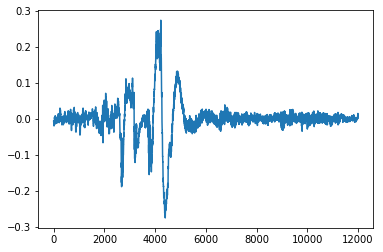

In [66]:
plt.plot(brain)

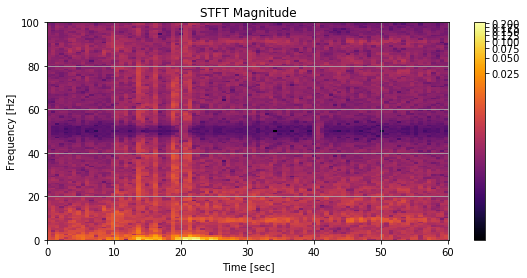

In [67]:
calcSTFT_norm(brain, 200, figsize=(9,4), ylim_max=100, cmap='inferno')

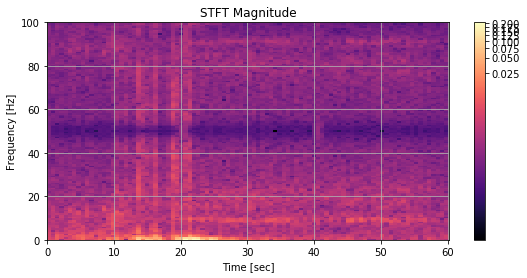

In [68]:
calcSTFT_norm(brain, 200, figsize=(9,4), ylim_max=100)